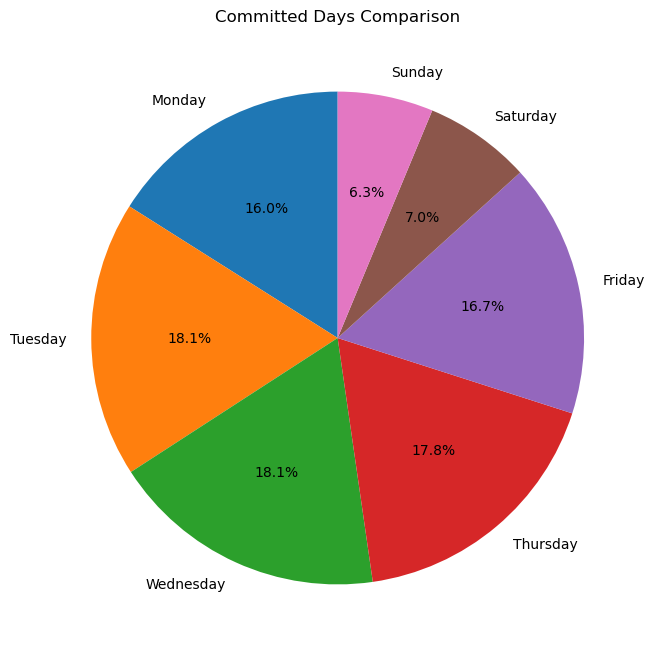

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Exploratory Data Analysis (EDA) - Pie Chart Committed Days Comparison
df = pd.read_csv("full.csv")

# Extract Day Name
df['parsed_date'] = df['date'].apply(lambda x: datetime.strptime(x.rsplit(' ', 1)[0], '%a %b %d %H:%M:%S %Y'))
df['day_of_week'] = df['parsed_date'].dt.day_name()

# Count Occurrences 
day_counts = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).fillna(0)

# Plot Pie Chart
plt.figure(figsize=(8, 8))
day_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Committed Days Comparison")
plt.ylabel("")
plt.show()

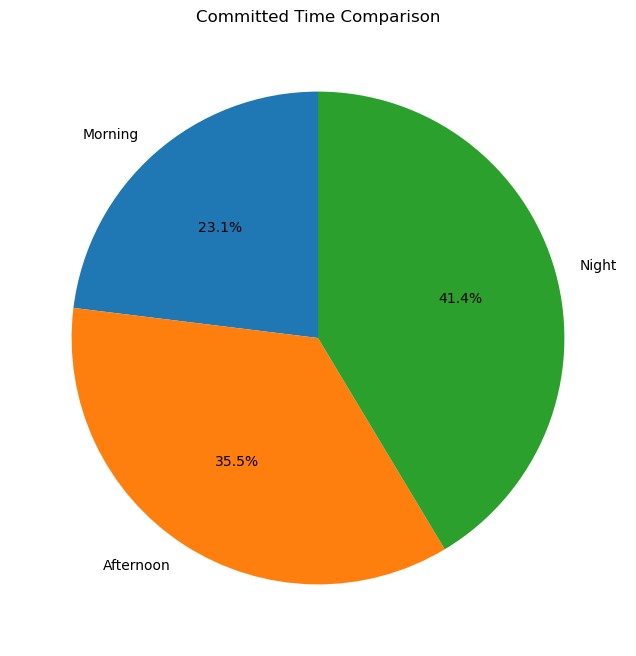

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Exploratory Data Analysis (EDA) - Pie Chart Committed Time Comparison (Morning, Afternoon, Night)
df = pd.read_csv("full.csv")

# Extract Hour from Date
df['parsed_date'] = df['date'].apply(lambda x: datetime.strptime(x.rsplit(' ', 1)[0], '%a %b %d %H:%M:%S %Y'))
df['hour'] = df['parsed_date'].dt.hour

# Categorize Time of Day
def get_time_period(val):
    if 5 <= val < 12:
        return 'Morning'
    elif 12 <= val < 18:
        return 'Afternoon'
    else:
        return 'Night'

df['time_period'] = df['hour'].apply(get_time_period)

# Count Occurrences
time_counts = df['time_period'].value_counts().reindex(['Morning', 'Afternoon', 'Night']).fillna(0)

# Plot Pie Chart
plt.figure(figsize=(8, 8))
time_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Committed Time Comparison")
plt.ylabel("")
plt.show()